In [30]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import torch
import torch.nn as nn
import torch
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd

df = pd.read_csv("sales_train.csv")
df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [3]:
df.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day'],
      dtype='object')

In [4]:
df.shop_id.unique()

array([59, 25, 24, 23, 19, 22, 18, 21, 28, 27, 29, 26,  4,  6,  2,  3,  7,
        0,  1, 16, 15,  8, 10, 14, 13, 12, 53, 31, 30, 32, 35, 56, 54, 47,
       50, 42, 43, 52, 51, 41, 38, 44, 37, 46, 45,  5, 57, 58, 55, 17,  9,
       49, 39, 40, 48, 34, 33, 20, 11, 36])

In [5]:
null_values = df.isnull().sum()
negative_values = (df[['item_price', 'item_cnt_day']] < 0).sum()
print(null_values)


date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64


In [6]:
print(negative_values)

item_price         1
item_cnt_day    7356
dtype: int64


In [7]:
df[df['item_price'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,15.05.2013,4,32,2973,-1.0,1.0


In [8]:
df[df['item_cnt_day'] < 0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,05.01.2013,0,25,2552,899.0,-1.0
148,23.01.2013,0,25,2321,999.0,-1.0
175,07.01.2013,0,25,2199,1449.0,-1.0
807,02.01.2013,0,25,2330,599.0,-1.0
1041,13.01.2013,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0
2934462,18.10.2015,33,25,4896,6398.0,-1.0
2935263,05.10.2015,33,25,10039,249.0,-1.0
2935643,16.10.2015,33,25,7893,2990.0,-1.0


In [9]:
df.shape

(2935849, 6)

In [10]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')

In [11]:
df = df[df['item_price'] < 100000]
df = df[df['item_cnt_day'] < 1001]

In [12]:
df.shape

(2935847, 6)

In [13]:
train = df
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [14]:
train['value'] = train['item_price'] * train['item_cnt_day']
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,value
0,2013-01-02,0,59,22154,999.00,1.0,999.00
1,2013-01-03,0,25,2552,899.00,1.0,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00
...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,299.00
2935845,2015-10-09,33,25,7460,299.00,1.0,299.00
2935846,2015-10-14,33,25,7459,349.00,1.0,349.00
2935847,2015-10-22,33,25,7440,299.00,1.0,299.00


<Axes: xlabel='date_block_num'>

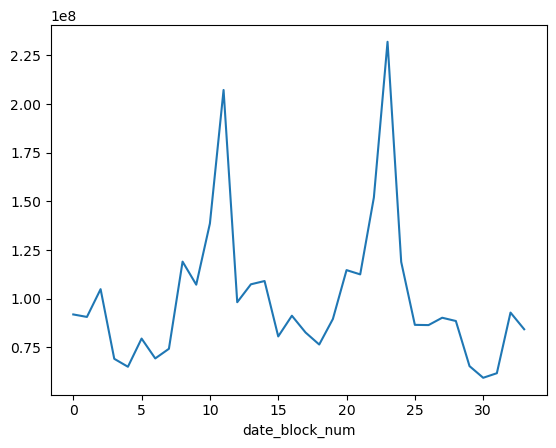

In [15]:
train.groupby('date_block_num')['value'].sum().plot()

In [16]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,value
0,2013-01-02,0,59,22154,999.00,1.0,999.00
1,2013-01-03,0,25,2552,899.00,1.0,899.00
2,2013-01-05,0,25,2552,899.00,-1.0,-899.00
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00
...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,299.00
2935845,2015-10-09,33,25,7460,299.00,1.0,299.00
2935846,2015-10-14,33,25,7459,349.00,1.0,349.00
2935847,2015-10-22,33,25,7440,299.00,1.0,299.00


In [17]:
price_95th_percentile = train['item_price'].quantile(0.95)
train = train[train['item_price'] <= price_95th_percentile]

In [18]:
train = train[train['item_cnt_day'] >= 0]
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,value
0,2013-01-02,0,59,22154,999.00,1.0,999.00
1,2013-01-03,0,25,2552,899.00,1.0,899.00
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00
5,2013-01-10,0,25,2564,349.00,1.0,349.00
...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,299.00
2935845,2015-10-09,33,25,7460,299.00,1.0,299.00
2935846,2015-10-14,33,25,7459,349.00,1.0,349.00
2935847,2015-10-22,33,25,7440,299.00,1.0,299.00


<Axes: xlabel='date_block_num'>

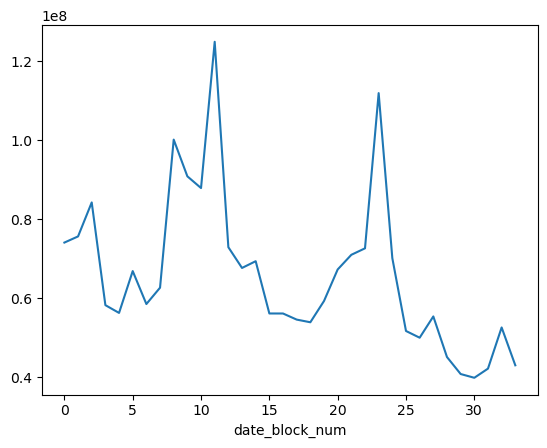

In [19]:
train.groupby('date_block_num')['value'].sum().plot()

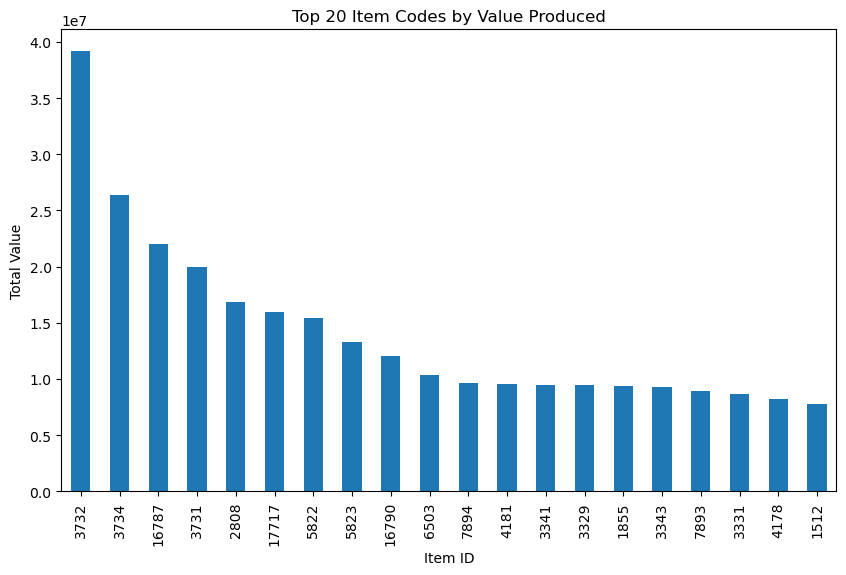

In [20]:
top_items = train.groupby('item_id')['value'].sum().sort_values(ascending=False).head(20)
top_items.plot(kind='bar', figsize=(10, 6), title='Top 20 Item Codes by Value Produced')
plt.xlabel('Item ID')
plt.ylabel('Total Value')
plt.show()

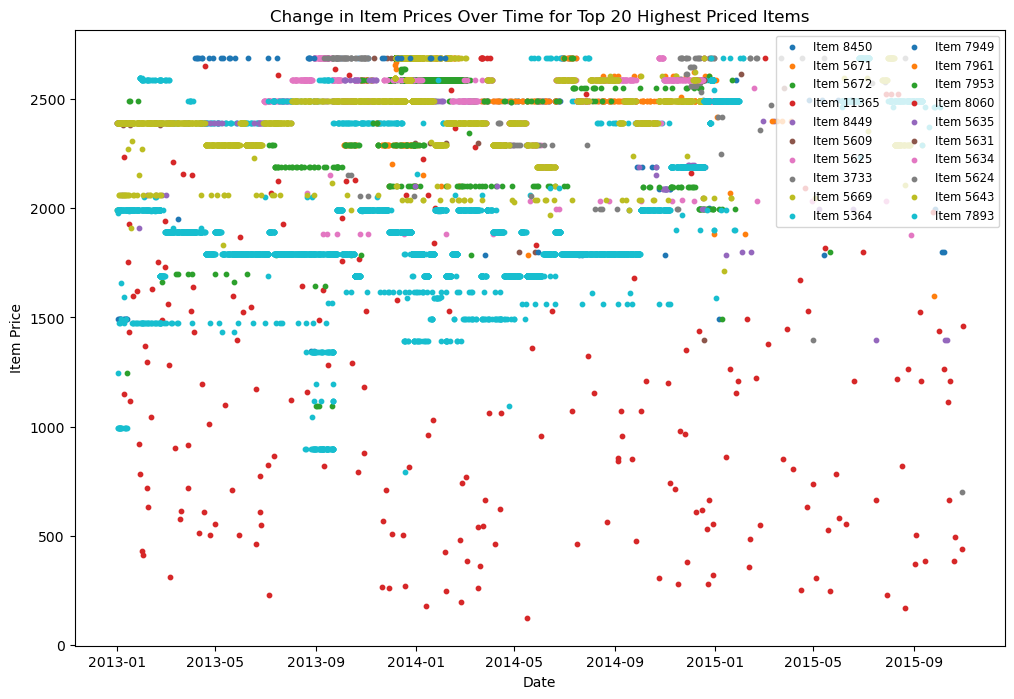

In [21]:
# Get the top 20 highest priced items
top_20_items = train.groupby('item_id')['item_price'].max().sort_values(ascending=False).head(20).index

# Filter the dataset for these items
top_20_data = train[train['item_id'].isin(top_20_items)]

# Plot the change in item prices over time as a scatter plot
plt.figure(figsize=(12, 8))
for item_id in top_20_items:
    item_data = top_20_data[top_20_data['item_id'] == item_id]
    plt.scatter(item_data['date'], item_data['item_price'], label=f'Item {item_id}', s=10)  # Use scatter plot

plt.title('Change in Item Prices Over Time for Top 20 Highest Priced Items')
plt.xlabel('Date')
plt.ylabel('Item Price')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.show()

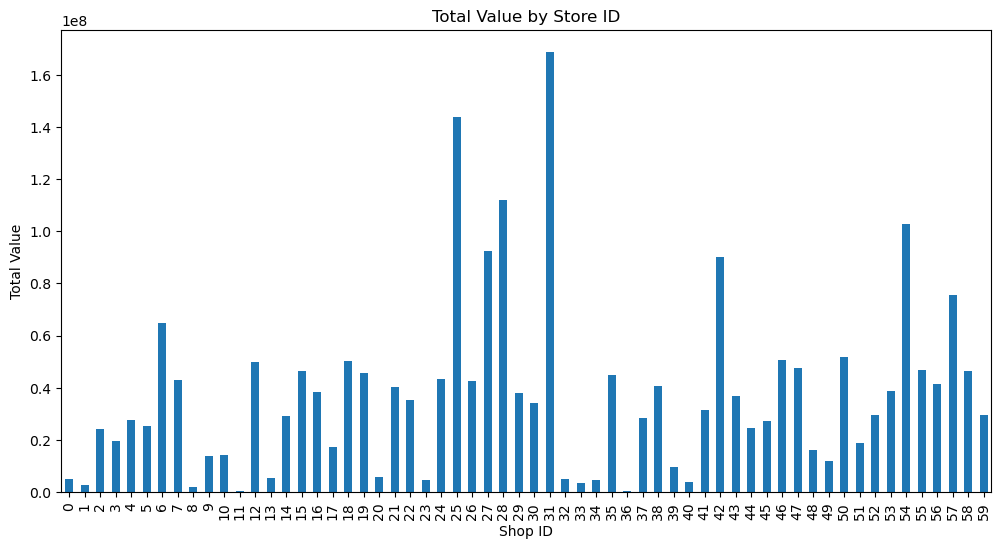

In [22]:
train.groupby('shop_id')['value'].sum().plot(kind='bar', figsize=(12, 6), title='Total Value by Store ID')
plt.xlabel('Shop ID')
plt.ylabel('Total Value')
plt.show()

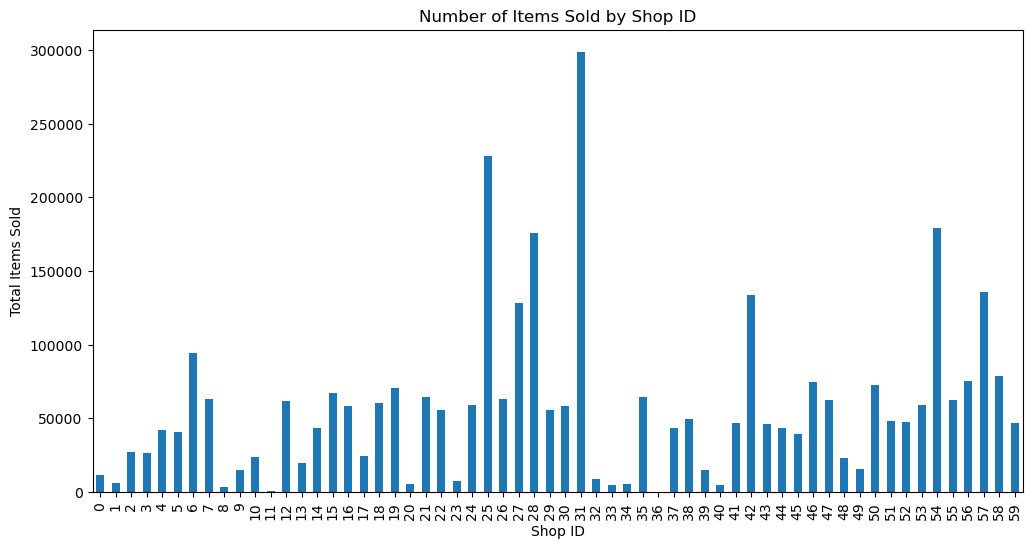

In [23]:
train.groupby('shop_id')['item_cnt_day'].sum().plot(kind='bar', figsize=(12, 6), title='Number of Items Sold by Shop ID')
plt.xlabel('Shop ID')
plt.ylabel('Total Items Sold')
plt.show()

/var/folders/z0/7461cc7j0kbb8xsxstr940cm0000gn/T/ipykernel_41782/2422741518.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlation_by_shop = train.groupby('shop_id').apply(lambda x: x['item_price'].corr(x['item_cnt_day']))


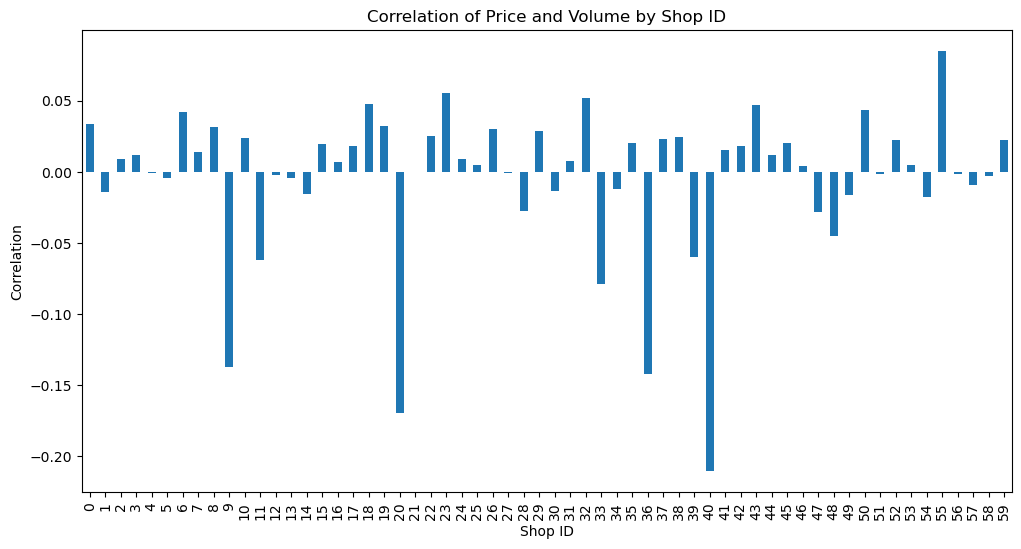

In [24]:
# Calculate correlation of item_price and item_cnt_day for each shop_id
correlation_by_shop = train.groupby('shop_id').apply(lambda x: x['item_price'].corr(x['item_cnt_day']))

# Plot the correlation
correlation_by_shop.plot(kind='bar', figsize=(12, 6), title='Correlation of Price and Volume by Shop ID')
plt.xlabel('Shop ID')
plt.ylabel('Correlation')
plt.show()

In [25]:
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,value
0,2013-01-02,0,59,22154,999.00,1.0,999.00
1,2013-01-03,0,25,2552,899.00,1.0,899.00
3,2013-01-06,0,25,2554,1709.05,1.0,1709.05
4,2013-01-15,0,25,2555,1099.00,1.0,1099.00
5,2013-01-10,0,25,2564,349.00,1.0,349.00
...,...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0,299.00
2935845,2015-10-09,33,25,7460,299.00,1.0,299.00
2935846,2015-10-14,33,25,7459,349.00,1.0,349.00
2935847,2015-10-22,33,25,7440,299.00,1.0,299.00


In [26]:
train = train.sort_values(by='date')
train

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,value
47150,2013-01-01,0,15,3698,598.5,1.0,598.5
102247,2013-01-01,0,41,6402,999.0,1.0,999.0
7646,2013-01-01,0,19,18320,199.0,1.0,199.0
85744,2013-01-01,0,54,14800,149.0,1.0,149.0
102257,2013-01-01,0,41,6095,1699.0,1.0,1699.0
...,...,...,...,...,...,...,...
2882554,2015-10-31,33,45,20264,169.0,1.0,169.0
2908881,2015-10-31,33,16,3442,1799.0,1.0,1799.0
2908877,2015-10-31,33,16,3243,599.0,3.0,1797.0
2926469,2015-10-31,33,31,12020,299.0,1.0,299.0


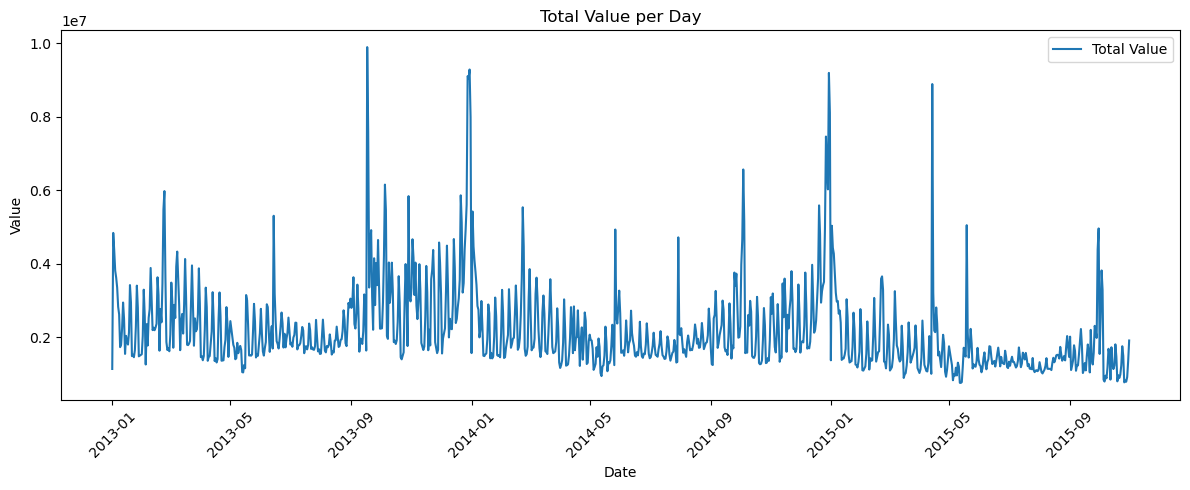

In [36]:
import matplotlib.pyplot as plt

daily_total = train.groupby('date')['value'].sum().reset_index()

plt.figure(figsize=(12, 5))
plt.plot(daily_total['date'], daily_total['value'], label='Total Value')
plt.title('Total Value per Day')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


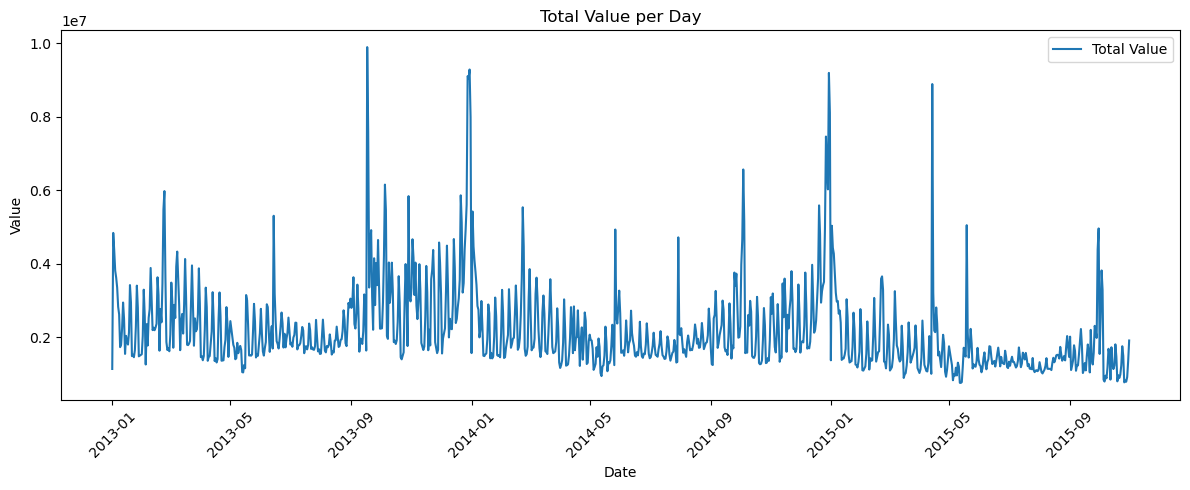

In [38]:
import matplotlib.pyplot as plt

value_by_day = train.groupby(['date', 'date_block_num'])['value'].sum().reset_index()

plt.figure(figsize=(12, 5))
plt.plot(value_by_day['date'], value_by_day['value'], label='Total Value')
plt.title('Total Value per Day')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


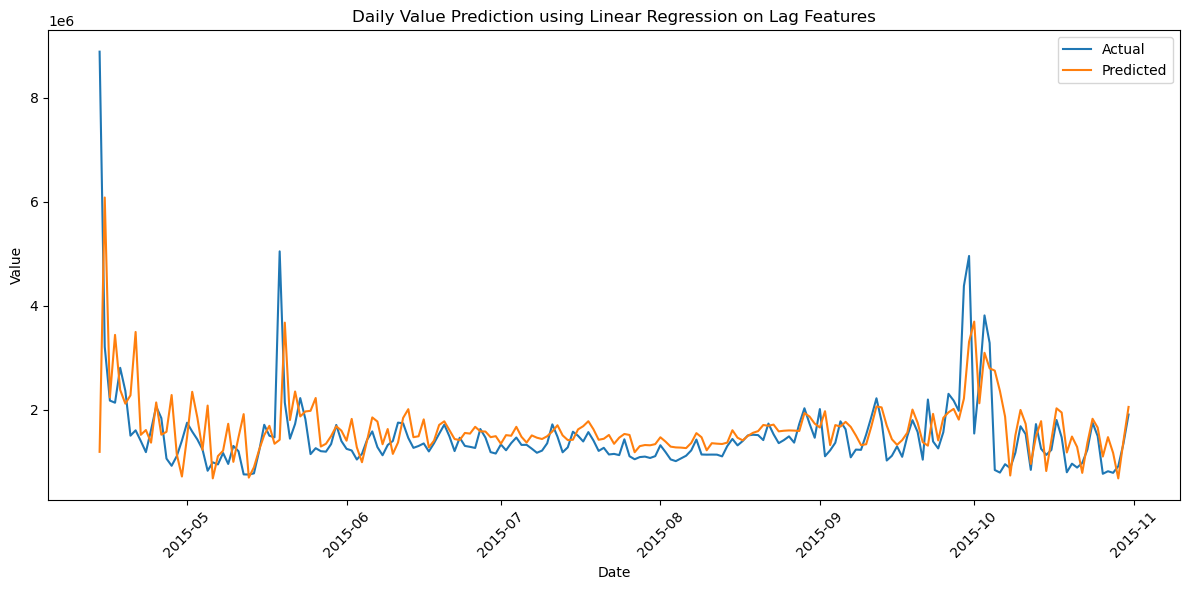

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Sort and normalize
value_by_day = value_by_day.sort_values('date').reset_index(drop=True)
scaler = MinMaxScaler()
value_by_day['value_scaled'] = scaler.fit_transform(value_by_day[['value']])

# Create lag features
seq_len = 30
for lag in range(1, seq_len + 1):
    value_by_day[f'lag_{lag}'] = value_by_day['value_scaled'].shift(lag)

# Drop rows with NaNs from lagging
lagged = value_by_day.dropna().reset_index(drop=True)

# Prepare data
feature_cols = [f'lag_{i}' for i in range(1, seq_len + 1)]
X = lagged[feature_cols].values
y = lagged['value_scaled'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Inverse scale
y_pred_unscaled = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_true_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Dates for plotting
test_dates = lagged['date'].iloc[-len(y_test):].values

# Plot
plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_true_unscaled, label='Actual')
plt.plot(test_dates, y_pred_unscaled, label='Predicted')
plt.title("Daily Value Prediction using Linear Regression on Lag Features")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


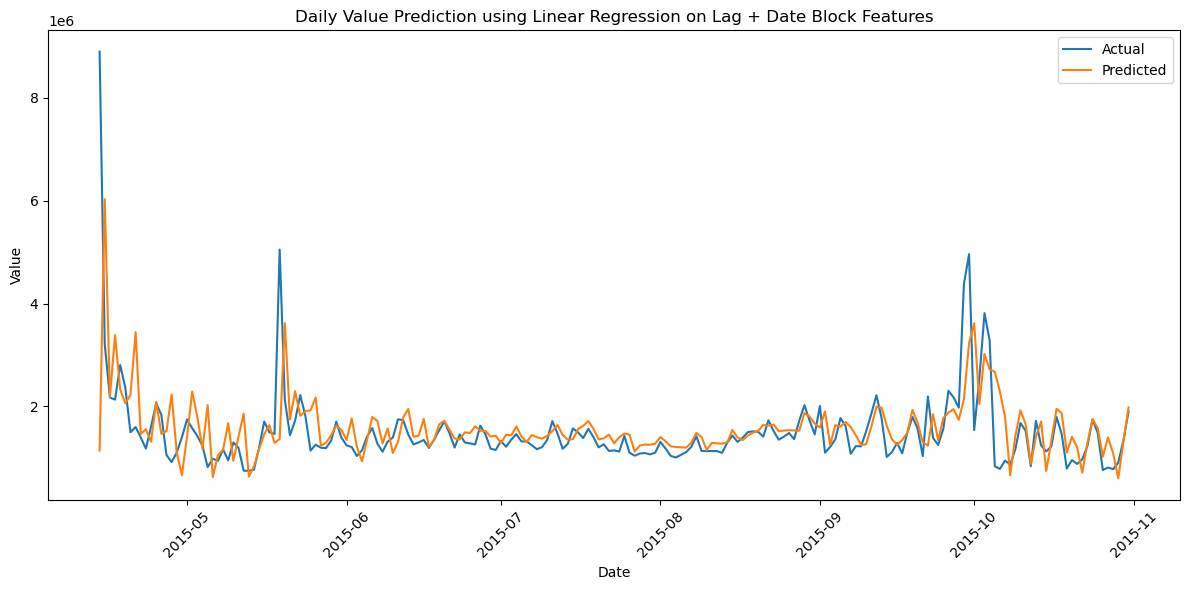

In [41]:
value_by_day = value_by_day.sort_values('date').reset_index(drop=True)

scaler_value = MinMaxScaler()
scaler_block = MinMaxScaler()
value_by_day['value_scaled'] = scaler_value.fit_transform(value_by_day[['value']])
value_by_day['block_scaled'] = scaler_block.fit_transform(value_by_day[['date_block_num']])

# Create lag features
seq_len = 30
for lag in range(1, seq_len + 1):
    value_by_day[f'lag_{lag}'] = value_by_day['value_scaled'].shift(lag)

value_by_day = value_by_day.dropna().reset_index(drop=True)

# Features: 30 lag values + scaled date_block_num
feature_cols = [f'lag_{i}' for i in range(1, seq_len + 1)] + ['block_scaled']
X = value_by_day[feature_cols].values
y = value_by_day['value_scaled'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

y_pred_unscaled = scaler_value.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_true_unscaled = scaler_value.inverse_transform(y_test.reshape(-1, 1)).flatten()

test_dates = value_by_day['date'].iloc[-len(y_test):].values

plt.figure(figsize=(12, 6))
plt.plot(test_dates, y_true_unscaled, label='Actual')
plt.plot(test_dates, y_pred_unscaled, label='Predicted')
plt.title("Daily Value Prediction using Linear Regression on Lag + Date Block Features")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Train MSE: 612687443145.43
Test MSE: 306151774054.36


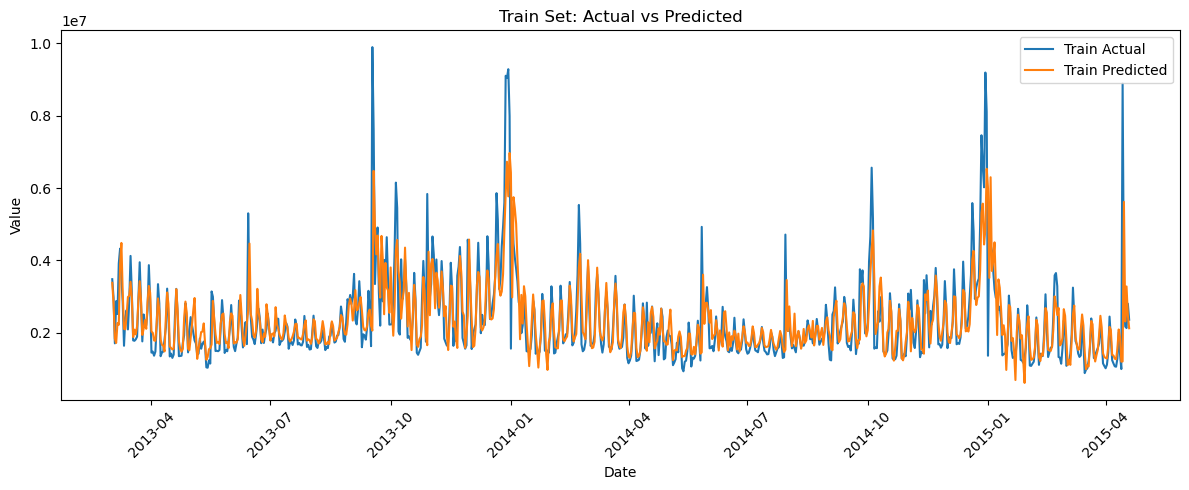

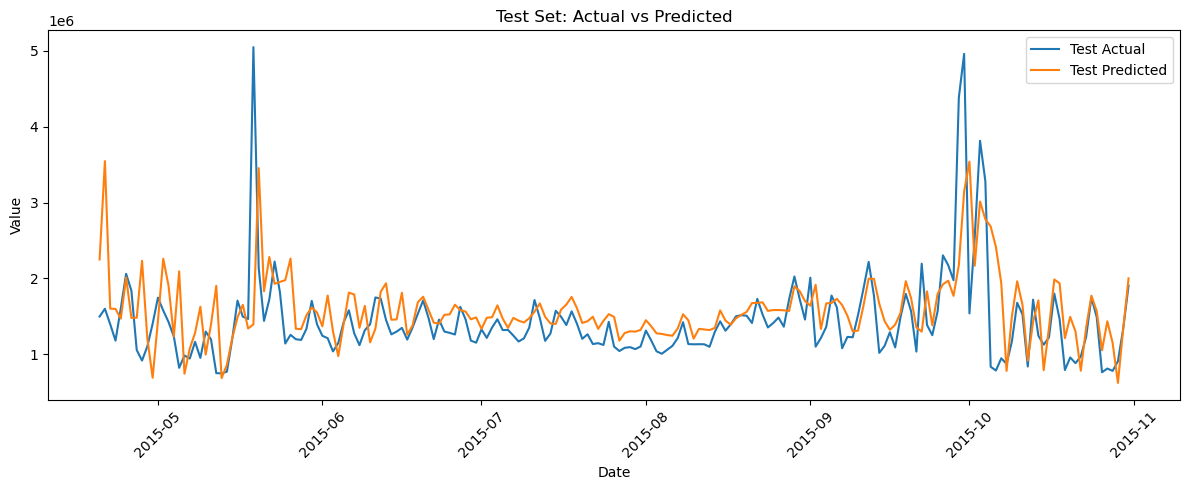

In [ ]:
value_by_day = value_by_day.sort_values('date').reset_index(drop=True)

scaler_value = MinMaxScaler()
scaler_block = MinMaxScaler()
value_by_day['value_scaled'] = scaler_value.fit_transform(value_by_day[['value']])
value_by_day['block_scaled'] = scaler_block.fit_transform(value_by_day[['date_block_num']])

# Create lag features
seq_len = 30
for lag in range(1, seq_len + 1):
    value_by_day[f'lag_{lag}'] = value_by_day['value_scaled'].shift(lag)

value_by_day = value_by_day.dropna().reset_index(drop=True)

feature_cols = [f'lag_{i}' for i in range(1, seq_len + 1)] + ['block_scaled']
X = value_by_day[feature_cols].values
y = value_by_day['value_scaled'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

y_train_unscaled = scaler_value.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test_unscaled = scaler_value.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_train_unscaled = scaler_value.inverse_transform(y_pred_train.reshape(-1, 1)).flatten()
y_pred_test_unscaled = scaler_value.inverse_transform(y_pred_test.reshape(-1, 1)).flatten()

train_dates = value_by_day['date'].iloc[:len(y_train)].values
test_dates = value_by_day['date'].iloc[-len(y_test):].values

mse_train = mean_squared_error(y_train_unscaled, y_pred_train_unscaled)
mse_test = mean_squared_error(y_test_unscaled, y_pred_test_unscaled)

print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")

plt.figure(figsize=(12, 5))
plt.plot(train_dates, y_train_unscaled, label='Train Actual')
plt.plot(train_dates, y_pred_train_unscaled, label='Train Predicted')
plt.title("Train Set: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(test_dates, y_test_unscaled, label='Test Actual')
plt.plot(test_dates, y_pred_test_unscaled, label='Test Predicted')
plt.title("Test Set: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

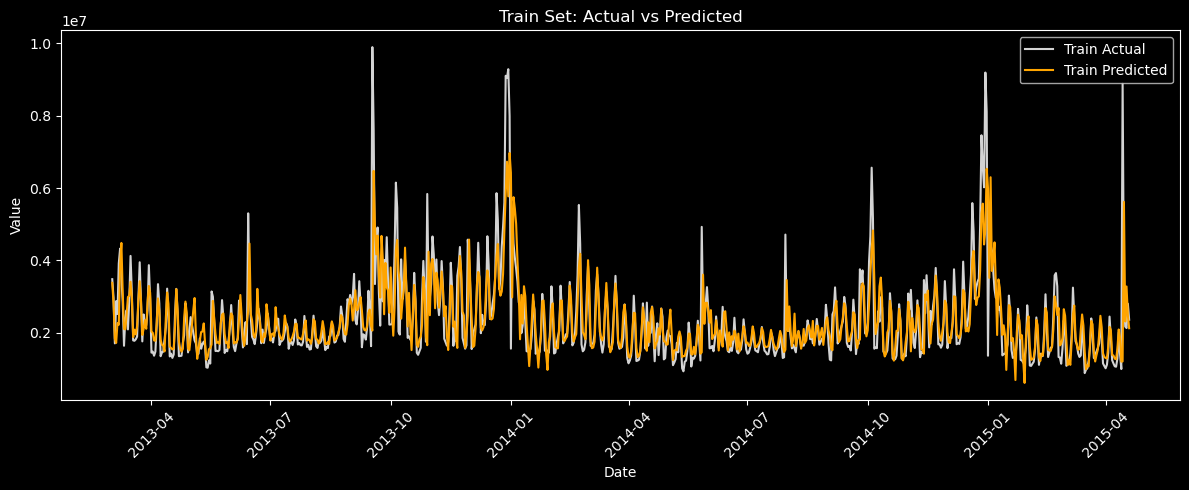

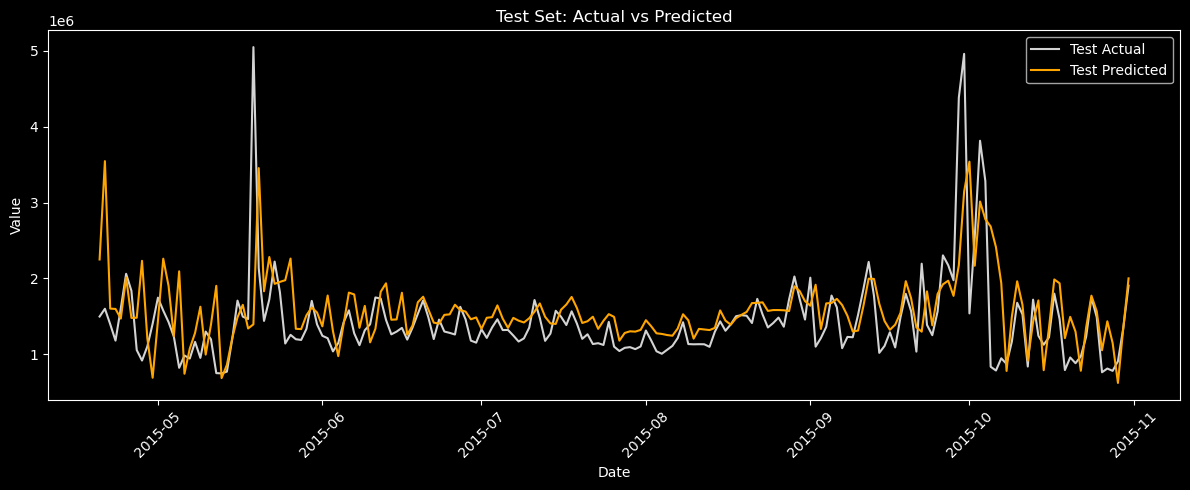

In [43]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

# Color configuration
actual_color = '#D3D3D3'     # Light gray
predicted_color = '#FFA500'  # Orange

plt.figure(figsize=(12, 5))
plt.plot(train_dates, y_train_unscaled, label='Train Actual', color=actual_color)
plt.plot(train_dates, y_pred_train_unscaled, label='Train Predicted', color=predicted_color)
plt.title("Train Set: Actual vs Predicted", color='white')
plt.xlabel("Date", color='white')
plt.ylabel("Value", color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(test_dates, y_test_unscaled, label='Test Actual', color=actual_color)
plt.plot(test_dates, y_pred_test_unscaled, label='Test Predicted', color=predicted_color)
plt.title("Test Set: Actual vs Predicted", color='white')
plt.xlabel("Date", color='white')
plt.ylabel("Value", color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.legend()
plt.tight_layout()
plt.show()


Train MSE: 101054055803.80
Test MSE: 730300455616.34


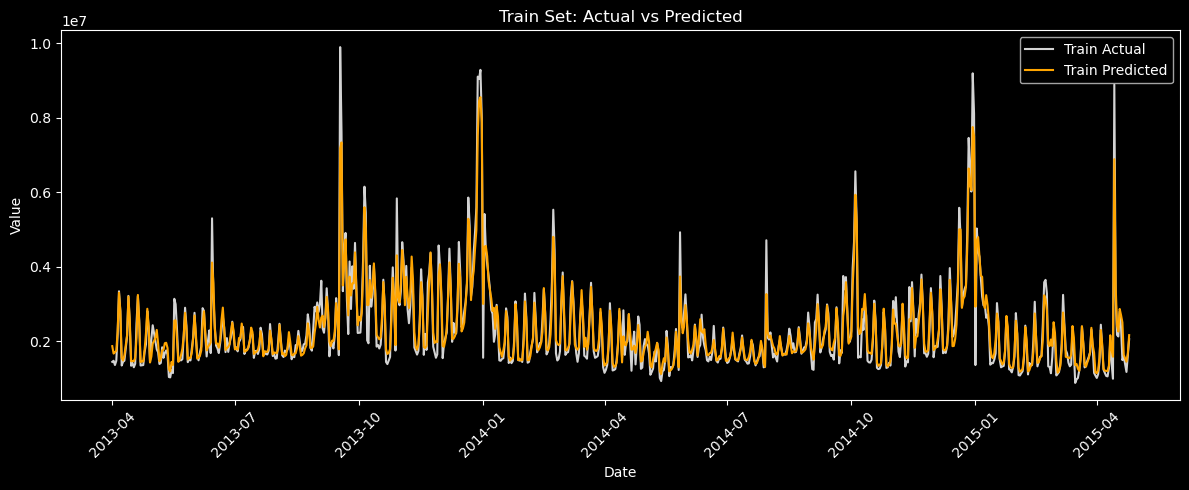

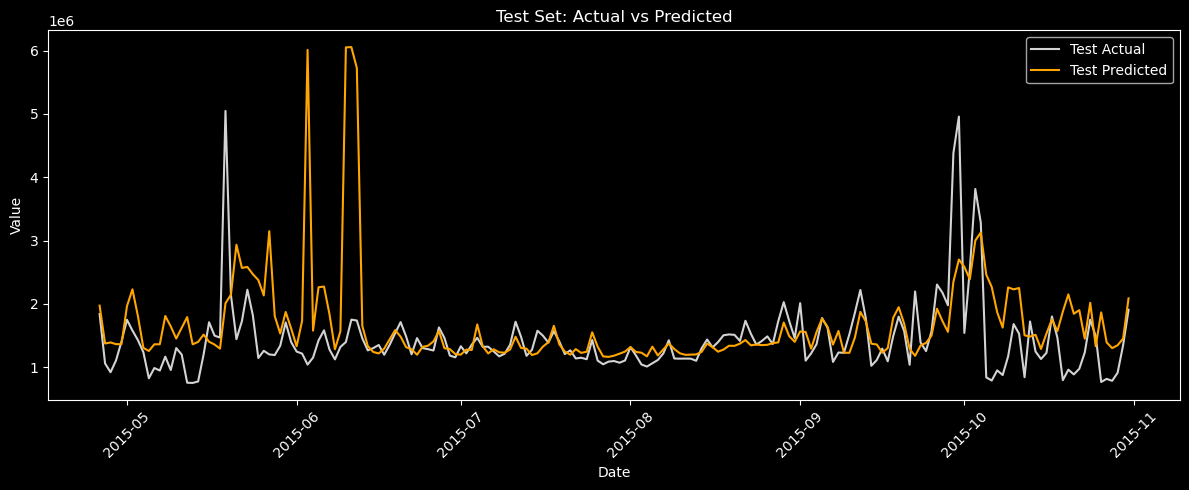

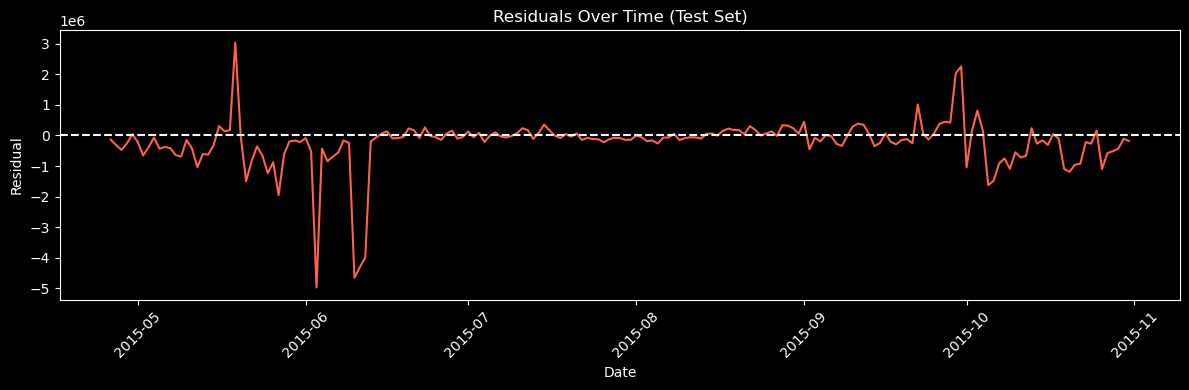

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Preprocessing
value_by_day = value_by_day.sort_values('date').reset_index(drop=True)
value_by_day['date'] = pd.to_datetime(value_by_day['date'])
value_by_day['dayofweek'] = value_by_day['date'].dt.dayofweek
value_by_day['rolling_mean_7'] = value_by_day['value'].rolling(7).mean()

scaler_value = MinMaxScaler()
scaler_block = MinMaxScaler()
scaler_roll = MinMaxScaler()

value_by_day['value_scaled'] = scaler_value.fit_transform(value_by_day[['value']])
value_by_day['block_scaled'] = scaler_block.fit_transform(value_by_day[['date_block_num']])
value_by_day['roll7_scaled'] = scaler_roll.fit_transform(value_by_day[['rolling_mean_7']])

# Lag features
seq_len = 30
for lag in range(1, seq_len + 1):
    value_by_day[f'lag_{lag}'] = value_by_day['value_scaled'].shift(lag)

# Drop NaNs
value_by_day = value_by_day.dropna().reset_index(drop=True)

# One-hot encode day of week
encoder = OneHotEncoder(sparse_output=False, drop='first')
dow_encoded = encoder.fit_transform(value_by_day[['dayofweek']])
dow_encoded_df = pd.DataFrame(dow_encoded, columns=[f'dow_{i}' for i in range(dow_encoded.shape[1])])

# Merge features
value_by_day = pd.concat([value_by_day, dow_encoded_df], axis=1)

# Feature matrix
feature_cols = [f'lag_{i}' for i in range(1, seq_len + 1)] + ['block_scaled', 'roll7_scaled'] + list(dow_encoded_df.columns)
X = value_by_day[feature_cols].values
y = value_by_day['value_scaled'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# Model
model = RandomForestRegressor(n_estimators=100, max_depth=8, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Inverse transform
y_train_unscaled = scaler_value.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test_unscaled = scaler_value.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_train_unscaled = scaler_value.inverse_transform(y_pred_train.reshape(-1, 1)).flatten()
y_pred_test_unscaled = scaler_value.inverse_transform(y_pred_test.reshape(-1, 1)).flatten()

# Dates
train_dates = value_by_day['date'].iloc[:len(y_train)].values
test_dates = value_by_day['date'].iloc[-len(y_test):].values

# MSE
mse_train = mean_squared_error(y_train_unscaled, y_pred_train_unscaled)
mse_test = mean_squared_error(y_test_unscaled, y_pred_test_unscaled)

print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")

# Plot theme
plt.style.use('dark_background')
actual_color = '#D3D3D3'
predicted_color = '#FFA500'

plt.figure(figsize=(12, 5))
plt.plot(train_dates, y_train_unscaled, label='Train Actual', color=actual_color)
plt.plot(train_dates, y_pred_train_unscaled, label='Train Predicted', color=predicted_color)
plt.title("Train Set: Actual vs Predicted", color='white')
plt.xlabel("Date", color='white')
plt.ylabel("Value", color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(test_dates, y_test_unscaled, label='Test Actual', color=actual_color)
plt.plot(test_dates, y_pred_test_unscaled, label='Test Predicted', color=predicted_color)
plt.title("Test Set: Actual vs Predicted", color='white')
plt.xlabel("Date", color='white')
plt.ylabel("Value", color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.legend()
plt.tight_layout()
plt.show()

# Residuals
residuals = y_test_unscaled - y_pred_test_unscaled
plt.figure(figsize=(12, 4))
plt.plot(test_dates, residuals, color='#FF6347')
plt.axhline(0, color='white', linestyle='--')
plt.title("Residuals Over Time (Test Set)", color='white')
plt.xlabel("Date", color='white')
plt.ylabel("Residual", color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.show()


Train MSE: 3178999799.08
Test MSE: 346868623741.56


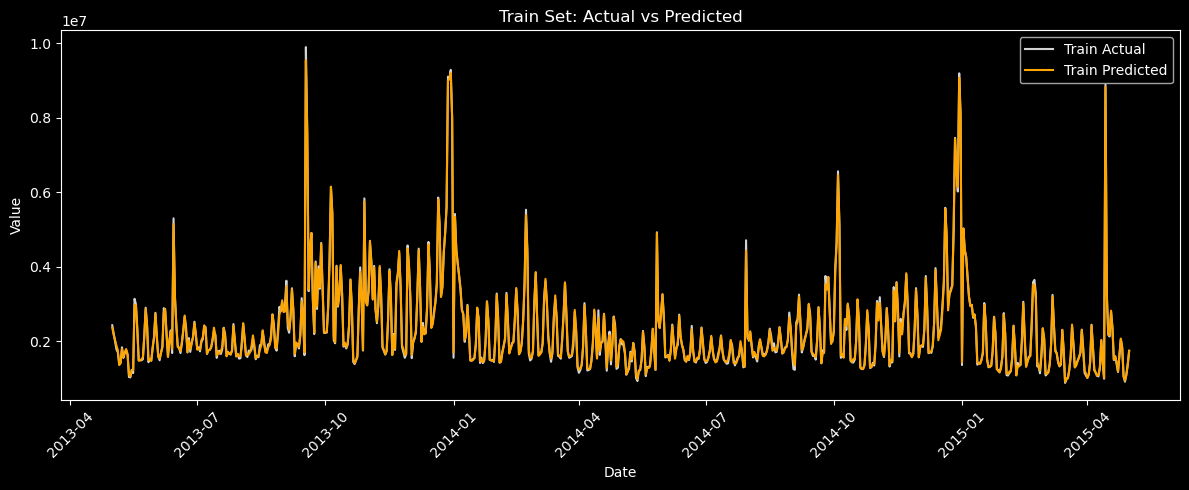

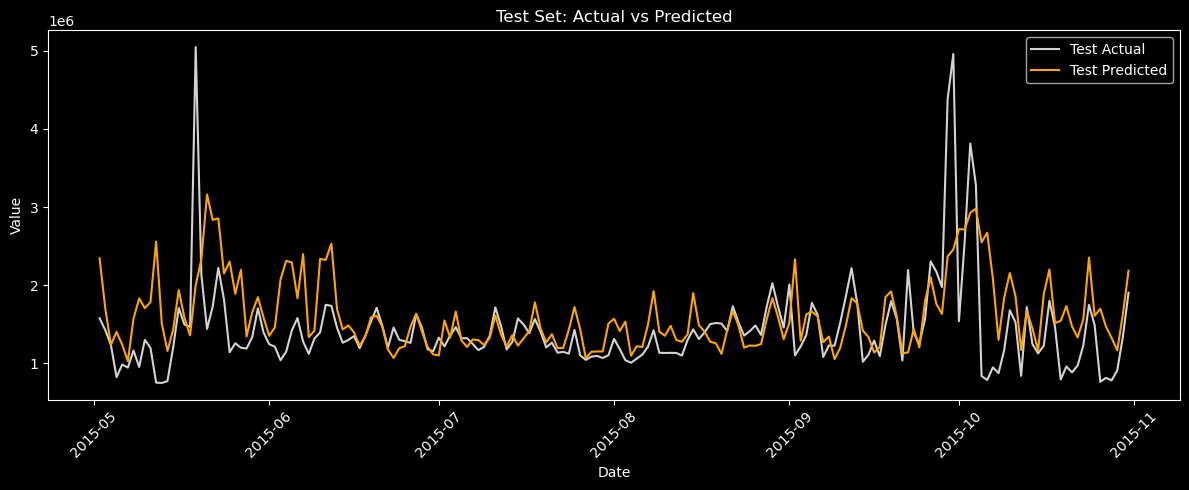

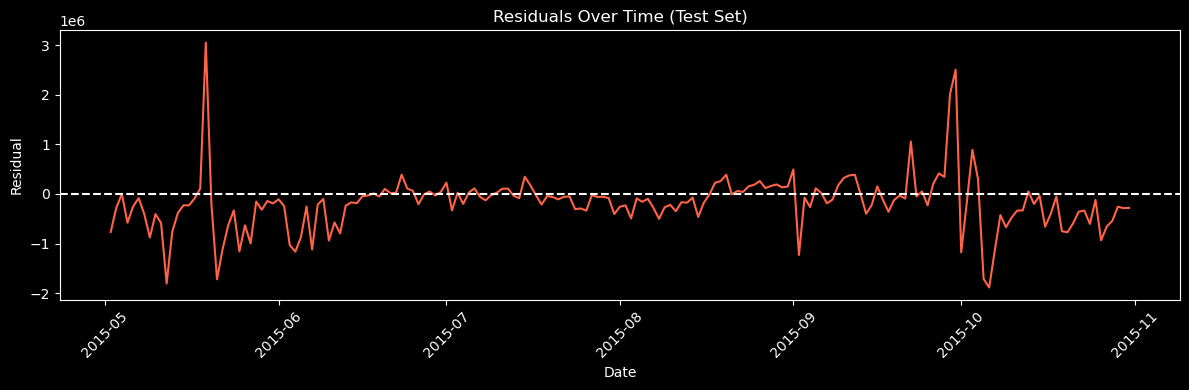

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Preprocessing
value_by_day = value_by_day.sort_values('date').reset_index(drop=True)
value_by_day['date'] = pd.to_datetime(value_by_day['date'])
value_by_day['dayofweek'] = value_by_day['date'].dt.dayofweek
value_by_day['rolling_mean_7'] = value_by_day['value'].rolling(7).mean()

scaler_value = MinMaxScaler()
scaler_block = MinMaxScaler()
scaler_roll = MinMaxScaler()

value_by_day['value_scaled'] = scaler_value.fit_transform(value_by_day[['value']])
value_by_day['block_scaled'] = scaler_block.fit_transform(value_by_day[['date_block_num']])
value_by_day['roll7_scaled'] = scaler_roll.fit_transform(value_by_day[['rolling_mean_7']])

seq_len = 30
for lag in range(1, seq_len + 1):
    value_by_day[f'lag_{lag}'] = value_by_day['value_scaled'].shift(lag)

value_by_day = value_by_day.dropna().reset_index(drop=True)

encoder = OneHotEncoder(sparse_output=False, drop='first')
dow_encoded = encoder.fit_transform(value_by_day[['dayofweek']])
dow_encoded_df = pd.DataFrame(dow_encoded, columns=[f'dow_{i}' for i in range(dow_encoded.shape[1])])

value_by_day = pd.concat([value_by_day, dow_encoded_df], axis=1)

feature_cols = [f'lag_{i}' for i in range(1, seq_len + 1)] + ['block_scaled', 'roll7_scaled'] + list(dow_encoded_df.columns)
X = value_by_day[feature_cols].values
y = value_by_day['value_scaled'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

# XGBoost Model
model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=42)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

y_train_unscaled = scaler_value.inverse_transform(y_train.reshape(-1, 1)).flatten()
y_test_unscaled = scaler_value.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_train_unscaled = scaler_value.inverse_transform(y_pred_train.reshape(-1, 1)).flatten()
y_pred_test_unscaled = scaler_value.inverse_transform(y_pred_test.reshape(-1, 1)).flatten()

train_dates = value_by_day['date'].iloc[:len(y_train)].values
test_dates = value_by_day['date'].iloc[-len(y_test):].values

mse_train = mean_squared_error(y_train_unscaled, y_pred_train_unscaled)
mse_test = mean_squared_error(y_test_unscaled, y_pred_test_unscaled)

print(f"Train MSE: {mse_train:.2f}")
print(f"Test MSE: {mse_test:.2f}")

plt.style.use('dark_background')
actual_color = '#D3D3D3'
predicted_color = '#FFA500'

plt.figure(figsize=(12, 5))
plt.plot(train_dates, y_train_unscaled, label='Train Actual', color=actual_color)
plt.plot(train_dates, y_pred_train_unscaled, label='Train Predicted', color=predicted_color)
plt.title("Train Set: Actual vs Predicted", color='white')
plt.xlabel("Date", color='white')
plt.ylabel("Value", color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(test_dates, y_test_unscaled, label='Test Actual', color=actual_color)
plt.plot(test_dates, y_pred_test_unscaled, label='Test Predicted', color=predicted_color)
plt.title("Test Set: Actual vs Predicted", color='white')
plt.xlabel("Date", color='white')
plt.ylabel("Value", color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.legend()
plt.tight_layout()
plt.show()

residuals = y_test_unscaled - y_pred_test_unscaled
plt.figure(figsize=(12, 4))
plt.plot(test_dates, residuals, color='#FF6347')
plt.axhline(0, color='white', linestyle='--')
plt.title("Residuals Over Time (Test Set)", color='white')
plt.xlabel("Date", color='white')
plt.ylabel("Residual", color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.tight_layout()
plt.show()
